### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import matplotlib.pyplot as plt

from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models

from keras.optimizers import SGD
tf.set_random_seed(42)

In [26]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [29]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [30]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

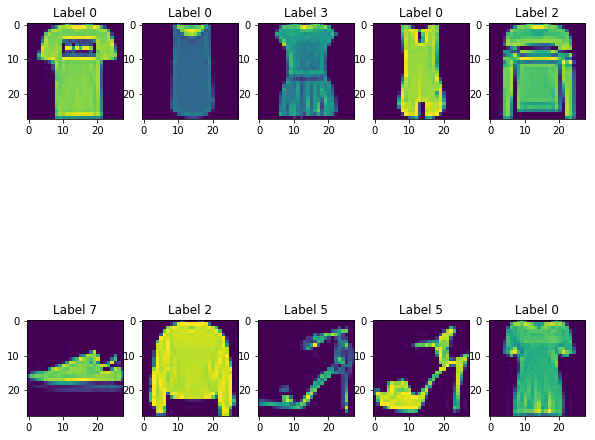

In [31]:
#Creating a plot with the first 10 images in the training set along with it's labels.
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 2
#for x in range(6):
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  plt.title("Label %i"%trainY[i])
  plt.imshow(trainX[i])
  
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

### Execute the model using model.fit()

In [0]:
trainX = trainX.reshape((60000, 28, 28, 1))
testX = testX.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
trainX, testX = trainX / 255.0, testX / 255.0

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [37]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 59s 983us/sample - loss: 1.0043 - acc: 0.6378
Epoch 2/5
60000/60000 [==============================] - 59s 980us/sample - loss: 0.5686 - acc: 0.7843
Epoch 3/5
60000/60000 [==============================] - 59s 976us/sample - loss: 0.4889 - acc: 0.8166
Epoch 4/5
60000/60000 [==============================] - 59s 982us/sample - loss: 0.4392 - acc: 0.8372
Epoch 5/5
60000/60000 [==============================] - 59s 980us/sample - loss: 0.4052 - acc: 0.8508


In [38]:
test_loss, test_acc = model.evaluate(testX, testY)
print("The accuracy score is")
print(test_acc)

10000/10000 [==============================] - 3s 326us/sample - loss: 0.4403 - acc: 0.8325
The accuracy score is
0.8325


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Adding the batch normalization step - This step should increase the accuracy of the model, which can hence be seen in the further steps.
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 64)          256       
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

In [40]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 60s 997us/sample - loss: 0.5160 - acc: 0.8165
Epoch 2/5
60000/60000 [==============================] - 59s 990us/sample - loss: 0.3463 - acc: 0.8738
Epoch 3/5
60000/60000 [==============================] - 59s 986us/sample - loss: 0.3037 - acc: 0.8901
Epoch 4/5
60000/60000 [==============================] - 59s 989us/sample - loss: 0.2791 - acc: 0.8983
Epoch 5/5
60000/60000 [==============================] - 59s 985us/sample - loss: 0.2588 - acc: 0.9056


### Execute the model

In [41]:
#After the addition of the batch normalization step it can be observed that the accuracy of the model has increased.
test_loss, test_acc = model.evaluate(testX, testY)
print("The accuracy score after the introduction of Batch Normalization is")
print(test_acc)

10000/10000 [==============================] - 3s 334us/sample - loss: 0.3030 - acc: 0.8848
The accuracy score after the introduction of Batch Normalization is
0.8848


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [42]:
#Adding the learing rate of 0.001, and this results in the increase in the accuracy score.
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=5)
test_loss, test_acc = model.evaluate(testX, testY)
print("The accuracy score after introducing learning rate hyper parameter (0.001) for SGD is")
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 60s 996us/sample - loss: 0.2426 - acc: 0.9103
Epoch 2/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2290 - acc: 0.9166
Epoch 3/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2172 - acc: 0.9206
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2069 - acc: 0.9244
Epoch 5/5
10000/10000 [==============================] - 3s 336us/sample - loss: 0.2713 - acc: 0.9047
The accuracy score after introducing learning rate hyper parameter (0.001) for SGD is
0.9047


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [44]:
#Adding the batch normalization step - This step should increase the accuracy of the model, which can hence be seen in the further steps.
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 3, 64)          256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)              

In [45]:
#Adding the learing rate of 0.03
sgd = tf.keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, trainY, epochs=5)
test_loss, test_acc = model.evaluate(testX, testY)
print("The accuracy score after introducing learning rate hyper parameter (0.03) for SGD and using 3 dense layer with 100,100 and 10 neurons respectively is")
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.5010 - acc: 0.8195
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3229 - acc: 0.8824
Epoch 3/5
60000/60000 [==============================] - 60s 996us/sample - loss: 0.2795 - acc: 0.8963
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2514 - acc: 0.9054
Epoch 5/5
10000/10000 [==============================] - 3s 345us/sample - loss: 0.2895 - acc: 0.8928
The accuracy score after introducing learning rate hyper parameter (0.03) for SGD and using 3 dense layer with 100,100 and 10 neurons respectively is
0.8928


## Review model

In [0]:
# The final neural network model with 3 Dense layers with 100,100,10 neurons respectively in each layer with cross entropy loss function and singmoid as activation
#in the hidden layers and softmax as activation function in the output layer. Using more number of neurons in the Dense layer results in better accuracy.

### Run the model

In [47]:
model.fit(trainX, trainY, epochs=5)
test_loss, test_acc = model.evaluate(testX, testY)
print("The accuracy scores of the neural network model is::")
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2204 - acc: 0.9180
Epoch 2/5
60000/60000 [==============================] - 60s 999us/sample - loss: 0.2059 - acc: 0.9238
Epoch 3/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1907 - acc: 0.9294
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1789 - acc: 0.9327
Epoch 5/5
10000/10000 [==============================] - 3s 330us/sample - loss: 0.2744 - acc: 0.9047
The accuracy scores of the neural network model is::
0.9047
